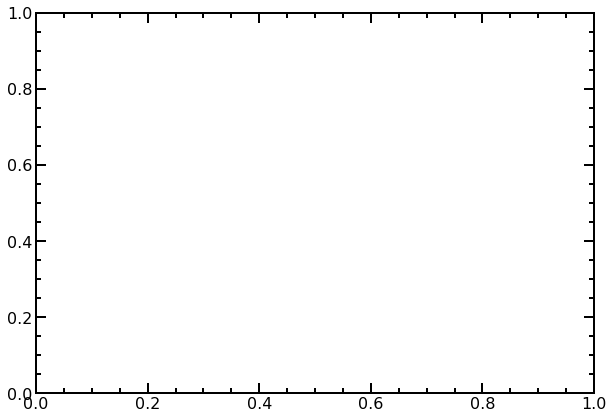

In [1]:
import sys
sys.dont_write_bytecode = True
import time
import numpy as np
from matplotlib import pyplot as plt
sys.path.append('/Users/longnguyen/Documents/GitHub/Fluxonium_berkeley/')
from Fluxonium_hamiltonians import qchard_fluxonium as fluxonium
from Fluxonium_hamiltonians import qchard_resonator as resonator
from Fluxonium_hamiltonians import qchard_squid as squid
from Fluxonium_hamiltonians import qchard_coupobj as coupobj
import plotting_settings
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 400

In [87]:
nlev_lc = 30
nlev_single = 7  # The number of single-qubit levels to show.
take_data_from_input_file = False

if not take_data_from_input_file:
    # Parameters of the first fluxonium.
    E_L1 = 0.8  # inductive energy
    E_C1 = 1.0  # charging energy
    E_J1 = 3.5  # Josephson energy
    phi_ext1 = np.pi  # external phase shift

    # Parameters of the second fluxonium.
    E_L2 = 1  # inductive energy
    E_C2 = 1.0  # charging energy
    E_J2 = 3.5  # Josephson energy
    phi_ext2 = np.pi  # external phase shift

    # Parameters of the squid.
    E_Cs = 0.2  # charging energy
    E_Jsum = 6  # total Josephson energy
    d = 0.05 #asymmetry
    phi_ext3 = np.pi  # external phase shift
    
    # Interaction energy between two fluxoniums.
    # E_int n_1 n_2 or E_int phi_1 phi_2.
    E_int = 0.3  # when a single value is needed
    E_int_range = np.linspace(0, 0.5, 11)  # when a range is needed
    coupling_type = 'coupler-charge'  # 'charge' or 'flux' or 'JC_charge' or 'coupler_charge
    
    #Interaction between fluxonium and squid
    
qubit1 = fluxonium.Fluxonium(E_J = E_J1, E_C=E_C1, E_L=E_L1, phi_ext=phi_ext1, nlev = nlev_single, nlev_lc = nlev_lc)
qubit2 = fluxonium.Fluxonium(E_J = E_J2, E_C=E_C2, E_L=E_L2, phi_ext=phi_ext2, nlev = nlev_single, nlev_lc = nlev_lc)
coupler = squid.Squid(E_C = E_Cs, E_Jsum = E_Jsum, d = d, phi_ext = phi_ext3, nlev = 5, nlev_charge = 10)
print("Qubit A: %s" % (qubit1))
print("Qubit B: %s" % (qubit2))
print("Coupler: %s" % (coupler))

Qubit A: A fluxonium qubit with E_L = 0.8 GHz, E_C = 1.0 GHz, and E_J = 3.5 GHz. The external phase shift is phi_ext/pi = 1.0.
Qubit B: A fluxonium qubit with E_L = 1 GHz, E_C = 1.0 GHz, and E_J = 3.5 GHz. The external phase shift is phi_ext/pi = 1.0.
Coupler: A SQUID with E_C = 0.2 GHz, and E_Jsum = 6 GHz, and d = 0.05 GHz. The external phase shift is phi_ext/pi = 1.0.


# Uncoupled system

In [100]:
## Spectra
phi_pts = np.linspace(0, 1, 101)*np.pi*2
energies1 = np.zeros((nlev_single, len(phi_pts)))
energies2 = np.zeros_like(energies1)
energies3 = np.zeros((5, len(phi_pts)))
n1_01 = np.zeros_like(phi_pts, dtype = complex)
n2_01 = np.zeros_like(phi_pts, dtype = complex)
n3_01 = np.zeros_like(phi_pts, dtype = complex)

n1_12 = np.zeros_like(phi_pts, dtype = complex)
n3_02 = np.zeros_like(phi_pts, dtype = complex)
n3_12 = np.zeros_like(phi_pts, dtype = complex)
phi1_01 = np.zeros_like(phi_pts, dtype = complex)
phi2_01 = np.zeros_like(phi_pts, dtype = complex)

for iphi, phi_ext in enumerate(phi_pts):
    qubit1.phi_ext = phi_ext
    qubit2.phi_ext = phi_ext
    coupler.phi_ext = phi_ext
    energies1[:, iphi] = qubit1.levels(nlev=nlev_single)
    energies2[:, iphi] = qubit2.levels(nlev=nlev_single)
    energies3[:, iphi] = coupler.levels(nlev = 5)
    n1_01[iphi] = qubit1.n_ij(level1=0,level2=1)
    n2_01[iphi] = qubit2.n_ij(level1=0,level2=1)
    n3_01[iphi] = coupler.n_ij(level1 = 0, level2 = 1)
    n3_02[iphi] = coupler.n_ij(level1 = 0, level2 = 2)
    n3_12[iphi] = coupler.n_ij(level1 = 1, level2 = 2)
#     phi1_01[iphi] = qubit1.phi_ij(level1=0,level2=1)
#     phi2_01[iphi] = qubit2.phi_ij(level1=0,level2=1)

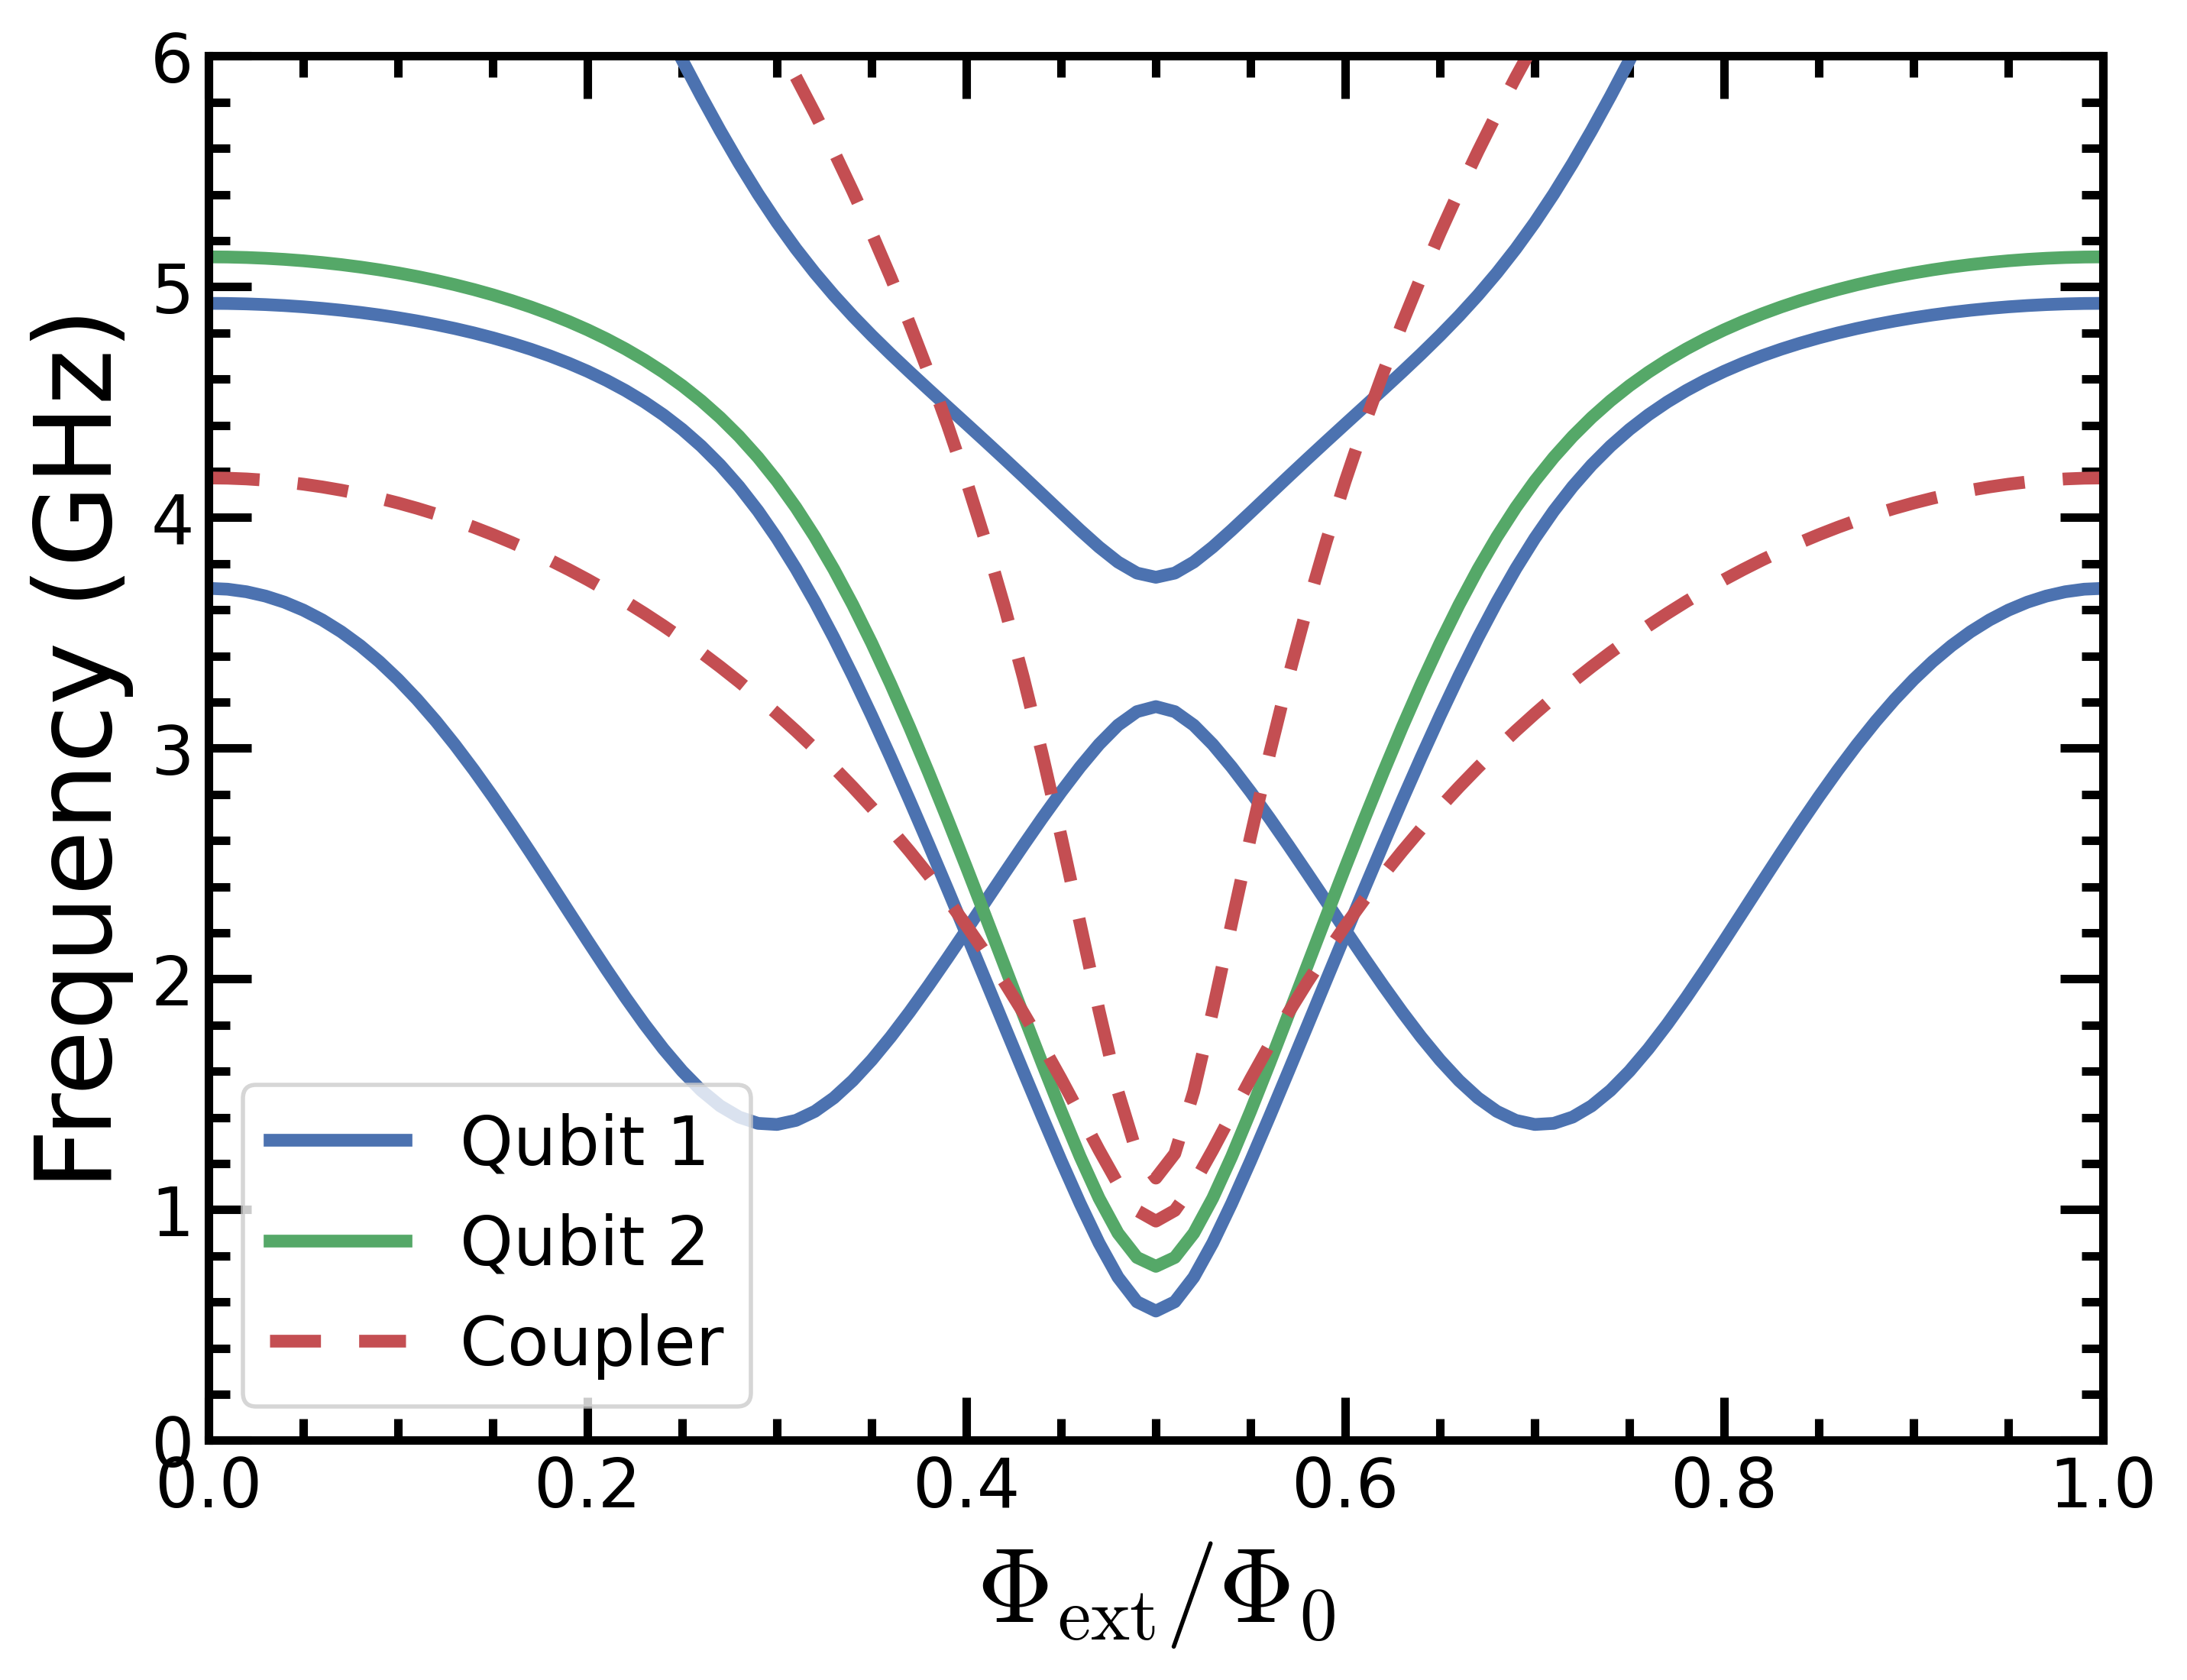

In [89]:
plt.figure(figsize = [8,6])
plt.plot(phi_pts/(np.pi*2), energies1[1, :] - energies1[0, :], color='C0', label='Qubit 1')
plt.plot(phi_pts/(np.pi*2), energies1[2, :] - energies1[0, :], color='C0')
plt.plot(phi_pts/(np.pi*2), energies1[2, :] - energies1[1, :], color='C0')
plt.plot(phi_pts/(np.pi*2), energies2[1, :] - energies2[0, :], color='C1', label='Qubit 2')
plt.plot(phi_pts/(np.pi*2), energies3[1, :] - energies3[0, :], linestyle = '--', color='C2', label='Coupler')
plt.plot(phi_pts/(np.pi*2), energies3[2, :] - energies3[0, :], linestyle = '--', color='C2')
# plt.plot(phi_pts/(np.pi*2), energies3[2, :] - energies3[1, :], linestyle = '--', color='C2')
         
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.ylim([0, 6])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel('Frequency (GHz)')
plt.legend()

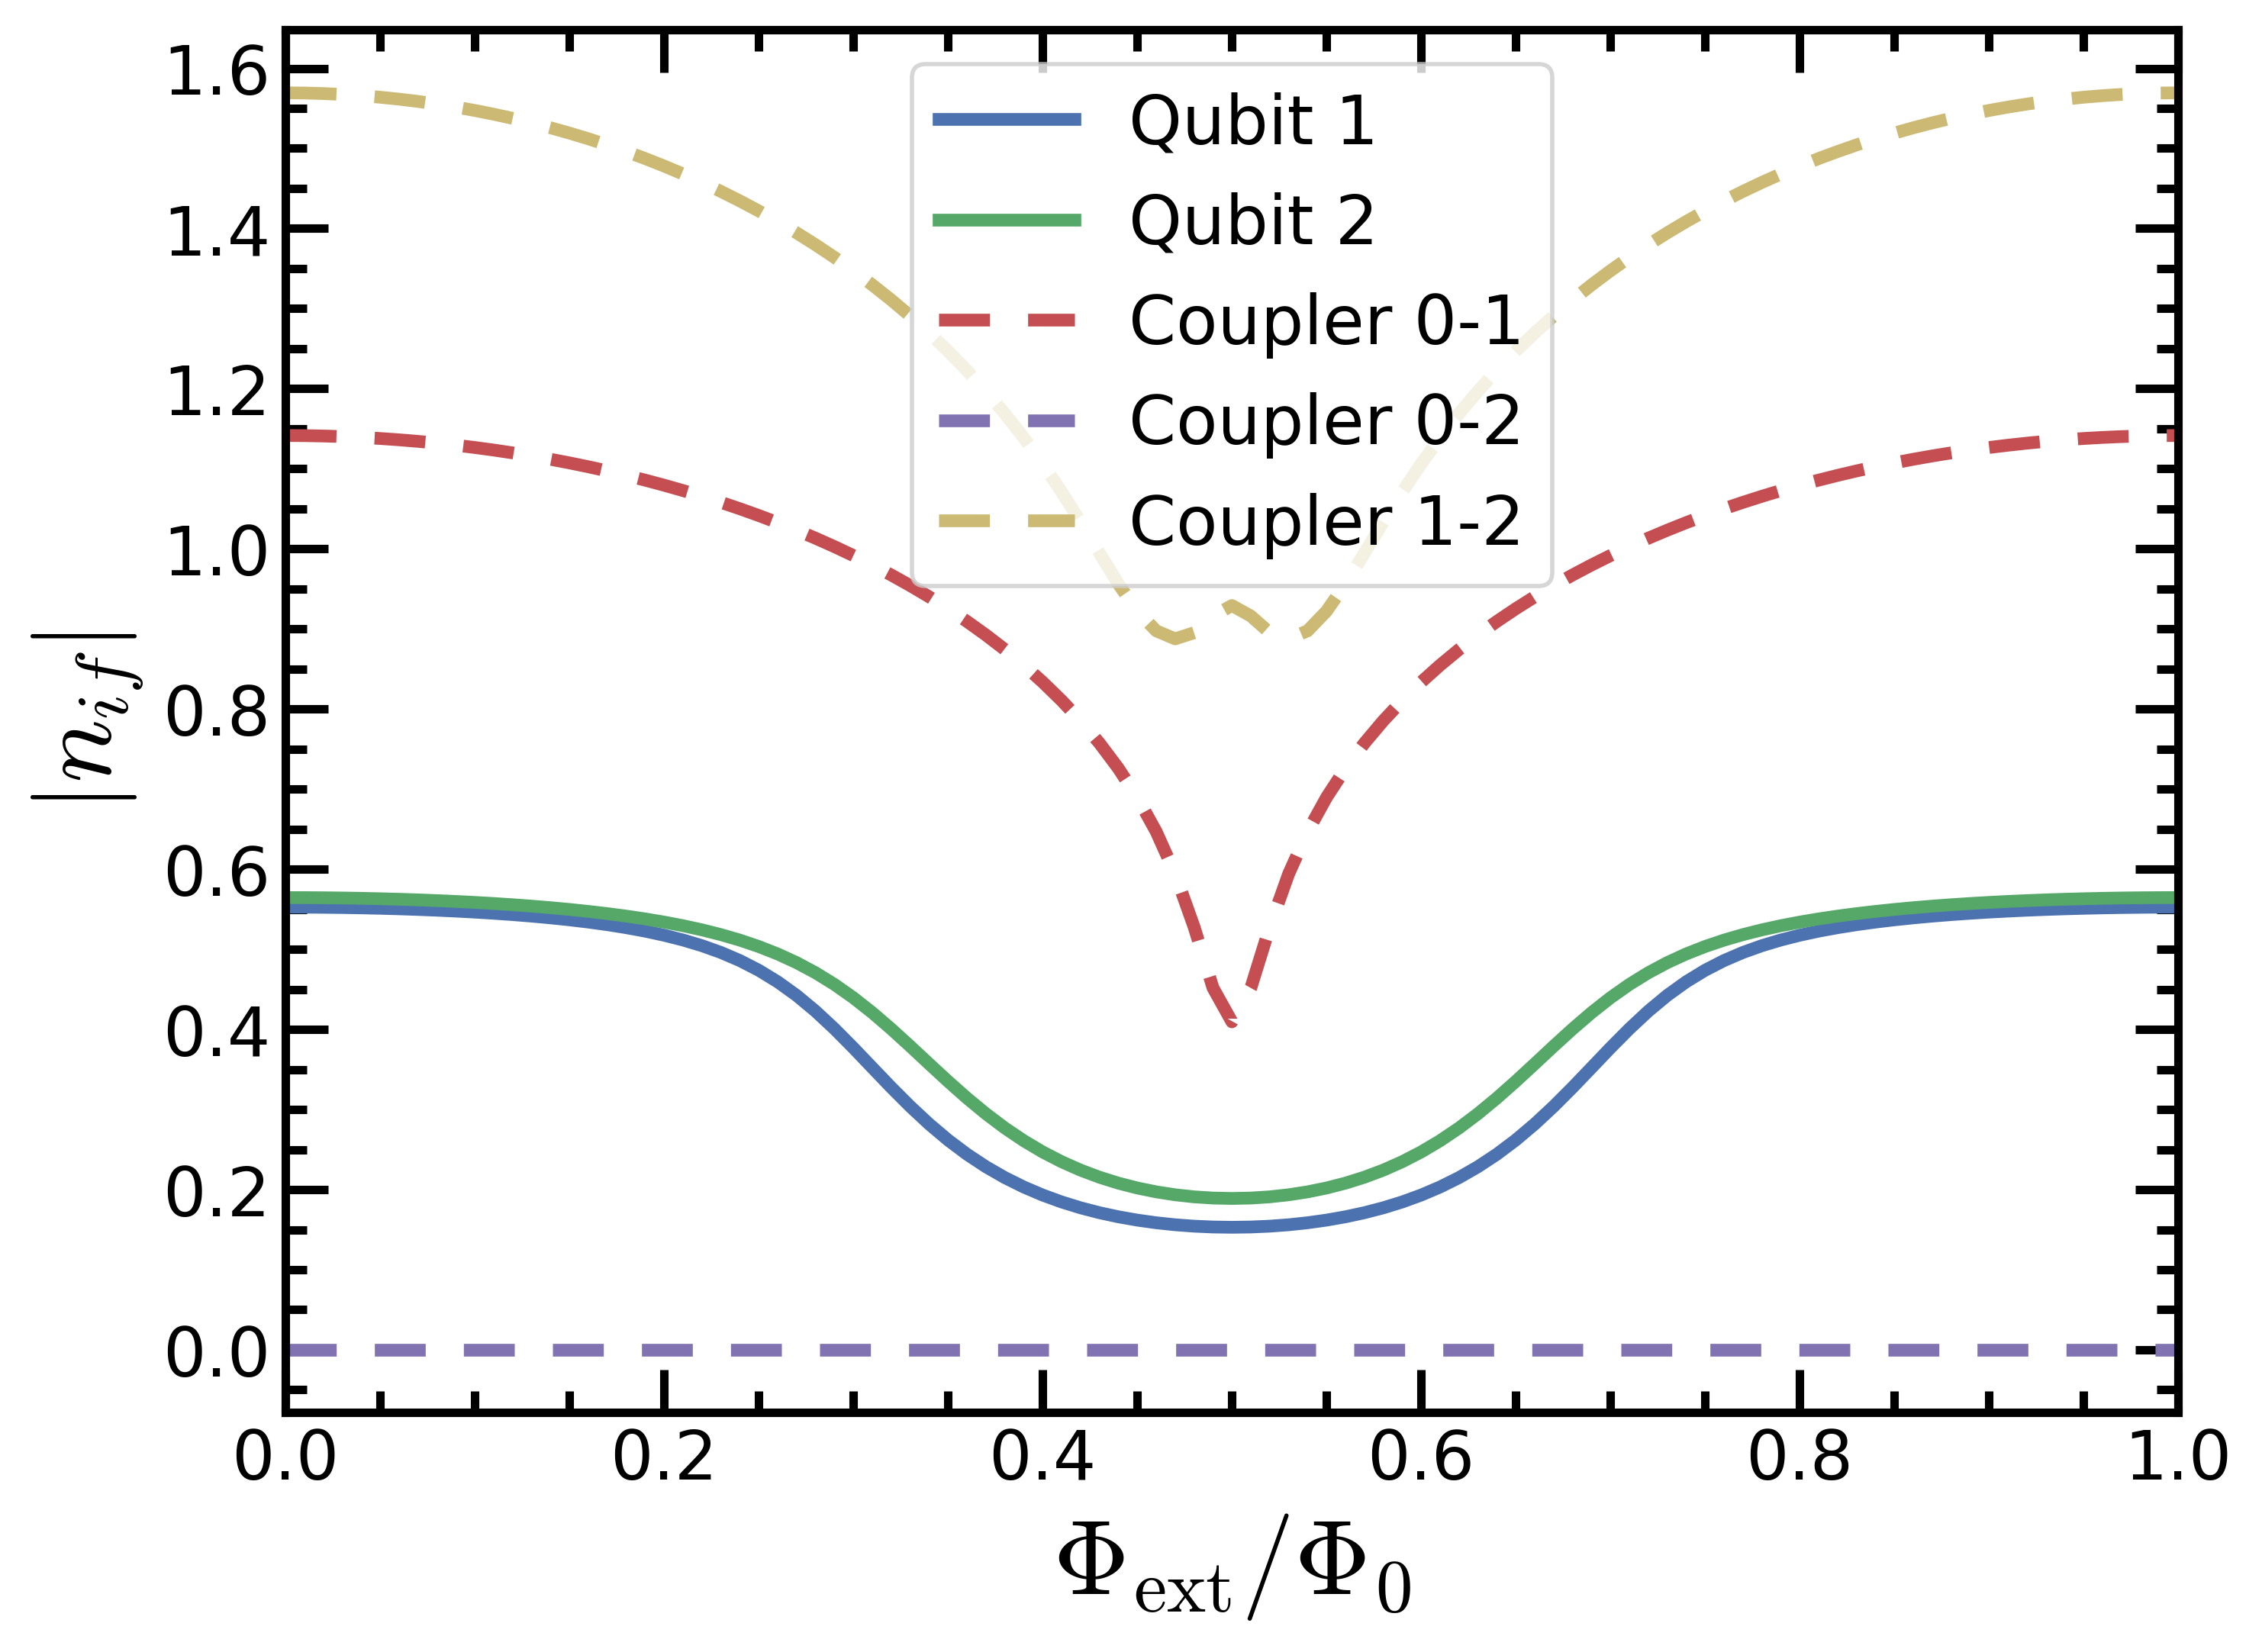

In [103]:
plt.figure(figsize = [8,6])
plt.xlim([phi_pts[0]/(np.pi*2), phi_pts[-1]/(np.pi*2)])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')
plt.ylabel(r'$|n_{if}|$')
plt.plot(phi_pts/(np.pi*2), abs(n1_01), label='Qubit 1')
plt.plot(phi_pts/(np.pi*2), abs(n2_01), label='Qubit 2')
plt.plot(phi_pts/(np.pi*2), abs(n3_01),linestyle = '--', label='Coupler 0-1')
plt.plot(phi_pts/(np.pi*2), abs(n3_02),linestyle = '--', label='Coupler 0-2')
plt.plot(phi_pts/(np.pi*2), abs(n3_12),linestyle = '--', label='Coupler 1-2')
plt.legend()

## Interacting system, sweep the coupling between coupler and qubits

In [104]:
E_int_array = np.linspace(0, 0.2, 51)
E_int_direct = 0.0
phi_ext = 0.5*2*np.pi
phi_ext_coupler = 0.45*2*np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
coupler.phi_ext = phi_ext_coupler
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev * 5, len(E_int_array)))
for idx, E_int in enumerate(E_int_array):
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, E_int, coupling_type],
                                   [qubit2, coupler, E_int, coupling_type],
                                   [qubit1, qubit2, E_int_direct,'charge'])
    energies_coupled_swE[:,idx] = system.levels()

(0.0, 0.2)

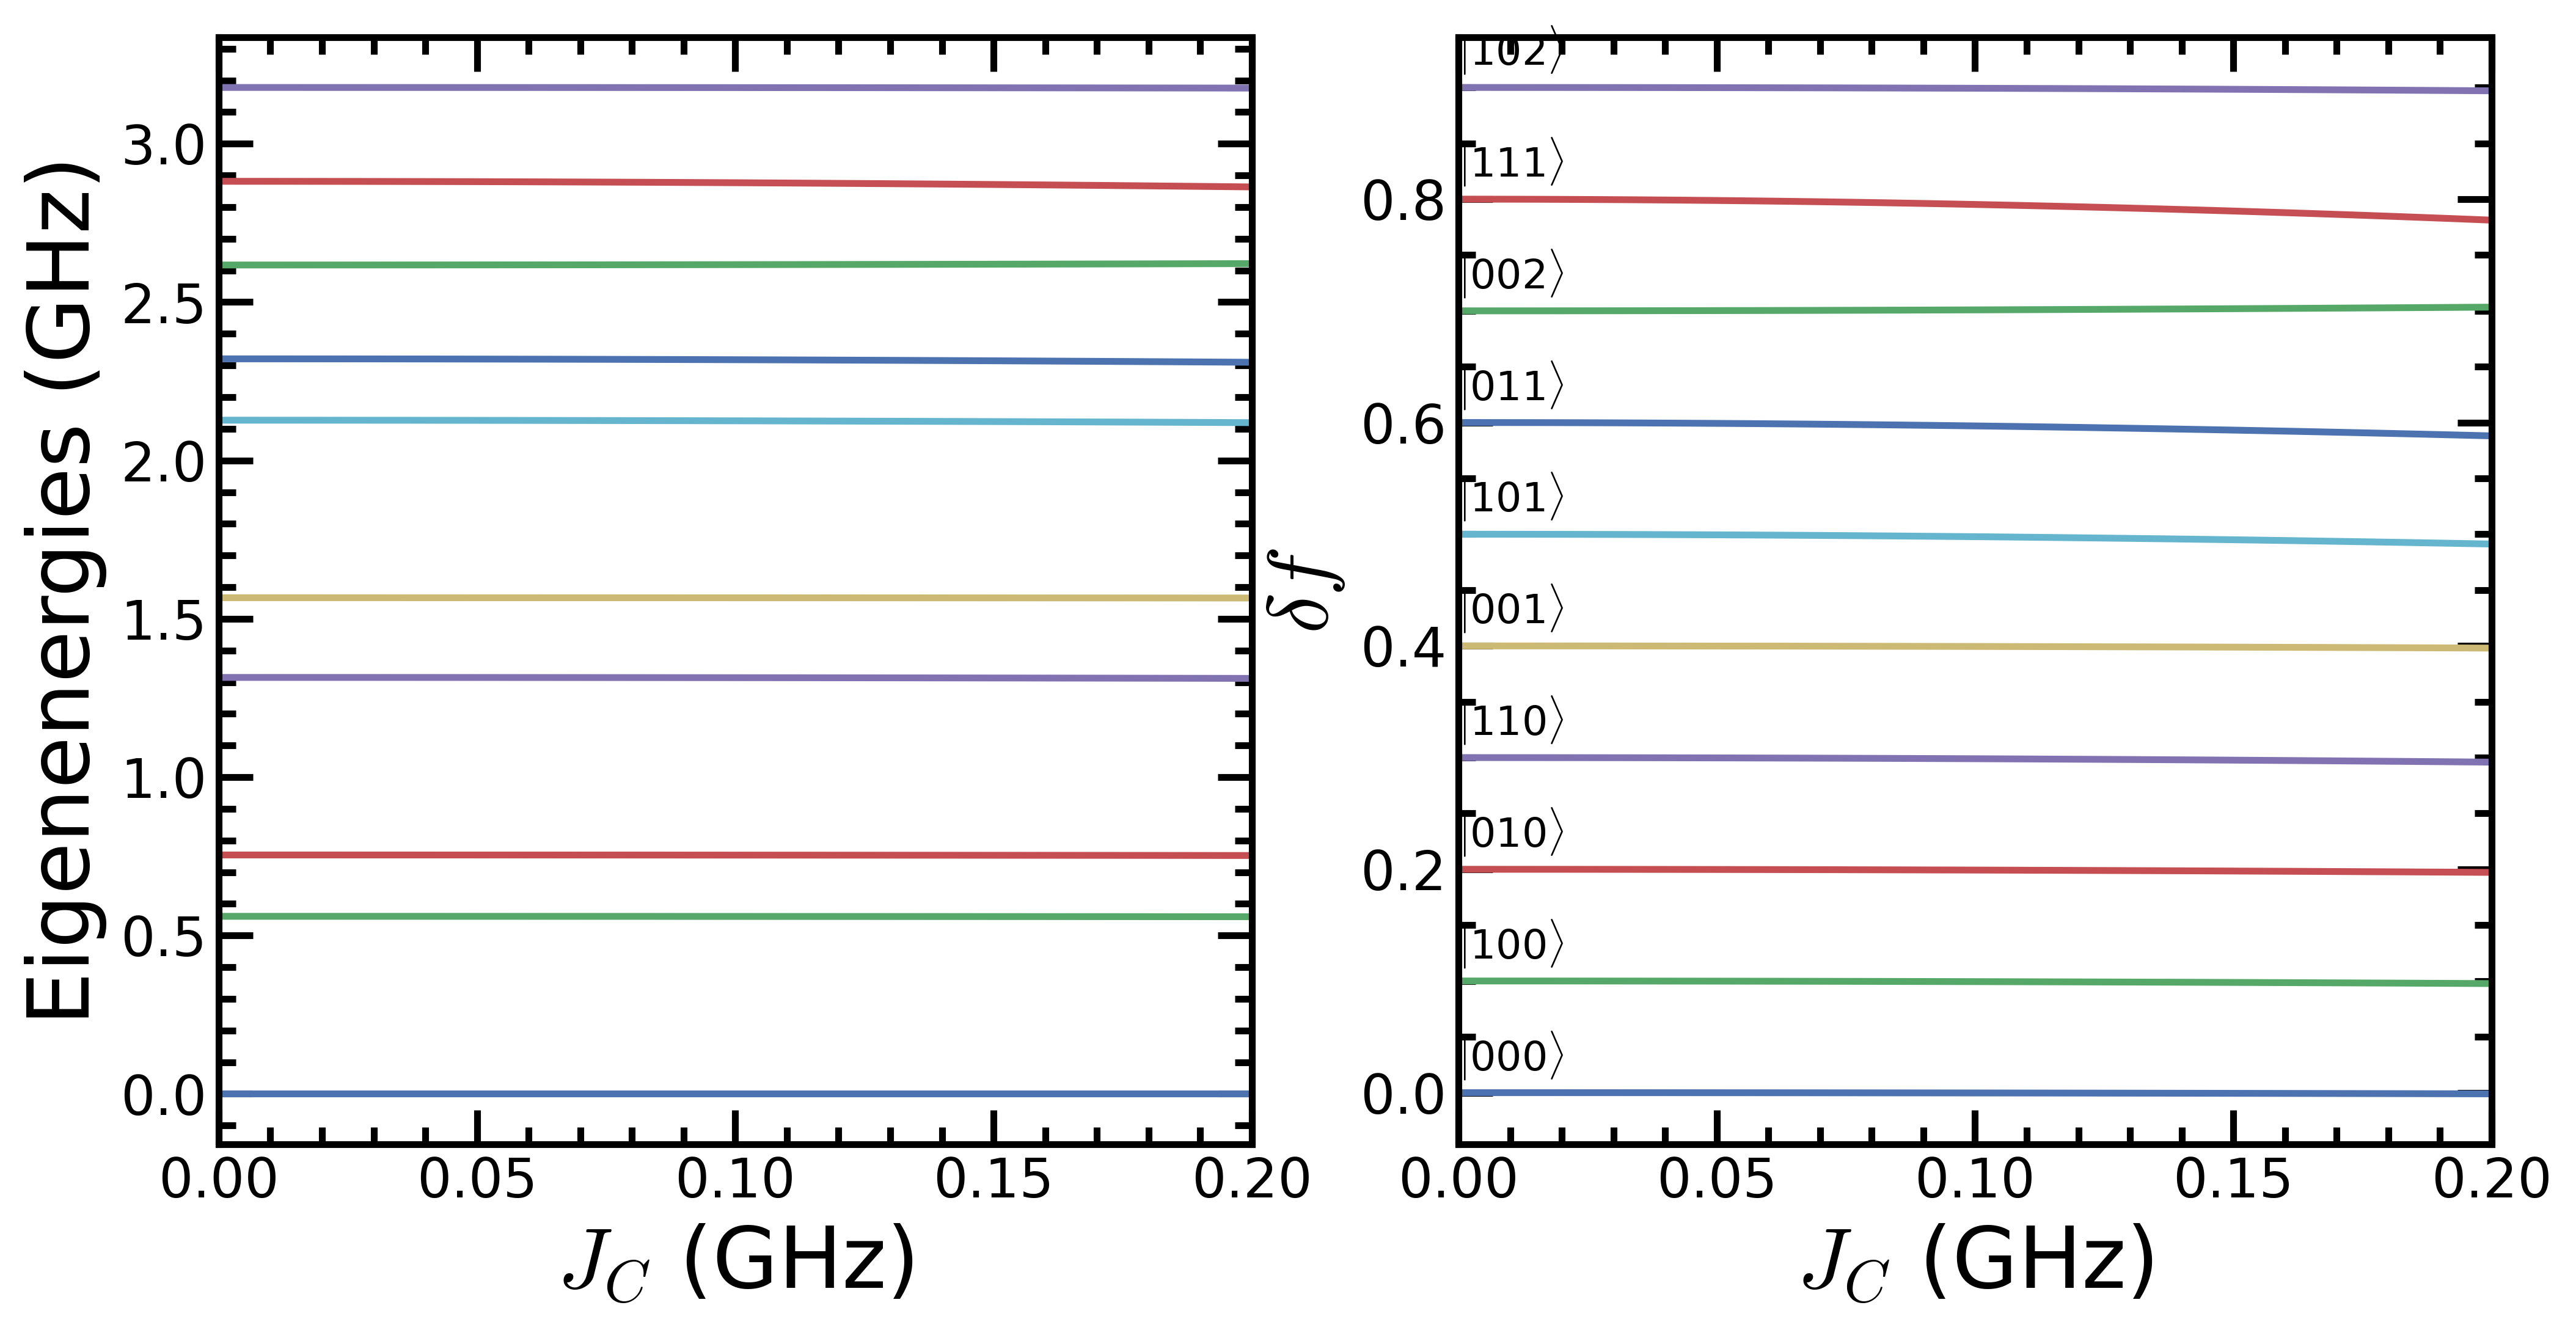

In [105]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = [12,6])
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
nlev_show = 10

#Transition freqs
for idx in range(0, nlev_show):
    ax1.plot(E_int_array, energies_coupled_swE[idx, :]-energies_coupled_swE[0, :], linewidth = 2.0)
ax1.set_xlabel('$J_C$ (GHz)')
ax1.set_ylabel('Eigenenergies (GHz)')
ax1.set_xlim([E_int_array[0], E_int_array[-1]])
# ax1.set_ylim([-0.2,15])

#State labeling
for idx in range(0, nlev_show):
    ax2.plot(E_int_array, 0.1 * idx+(energies_coupled_swE[idx, :]-energies_coupled_swE[idx, 0]), linewidth = 2.0)
    label = (r'$|$' + system.level_label(idx, label_format='str') + r'$\rangle$')
    ax2.text(0, 0.02 + 0.1 * idx, label, fontsize=12)
ax2.set_xlabel('$J_C$ (GHz)')
ax2.set_ylabel(r'$\delta f$')
ax2.set_xlim([E_int_array[0], E_int_array[-1]])

(0.0, 200.0)

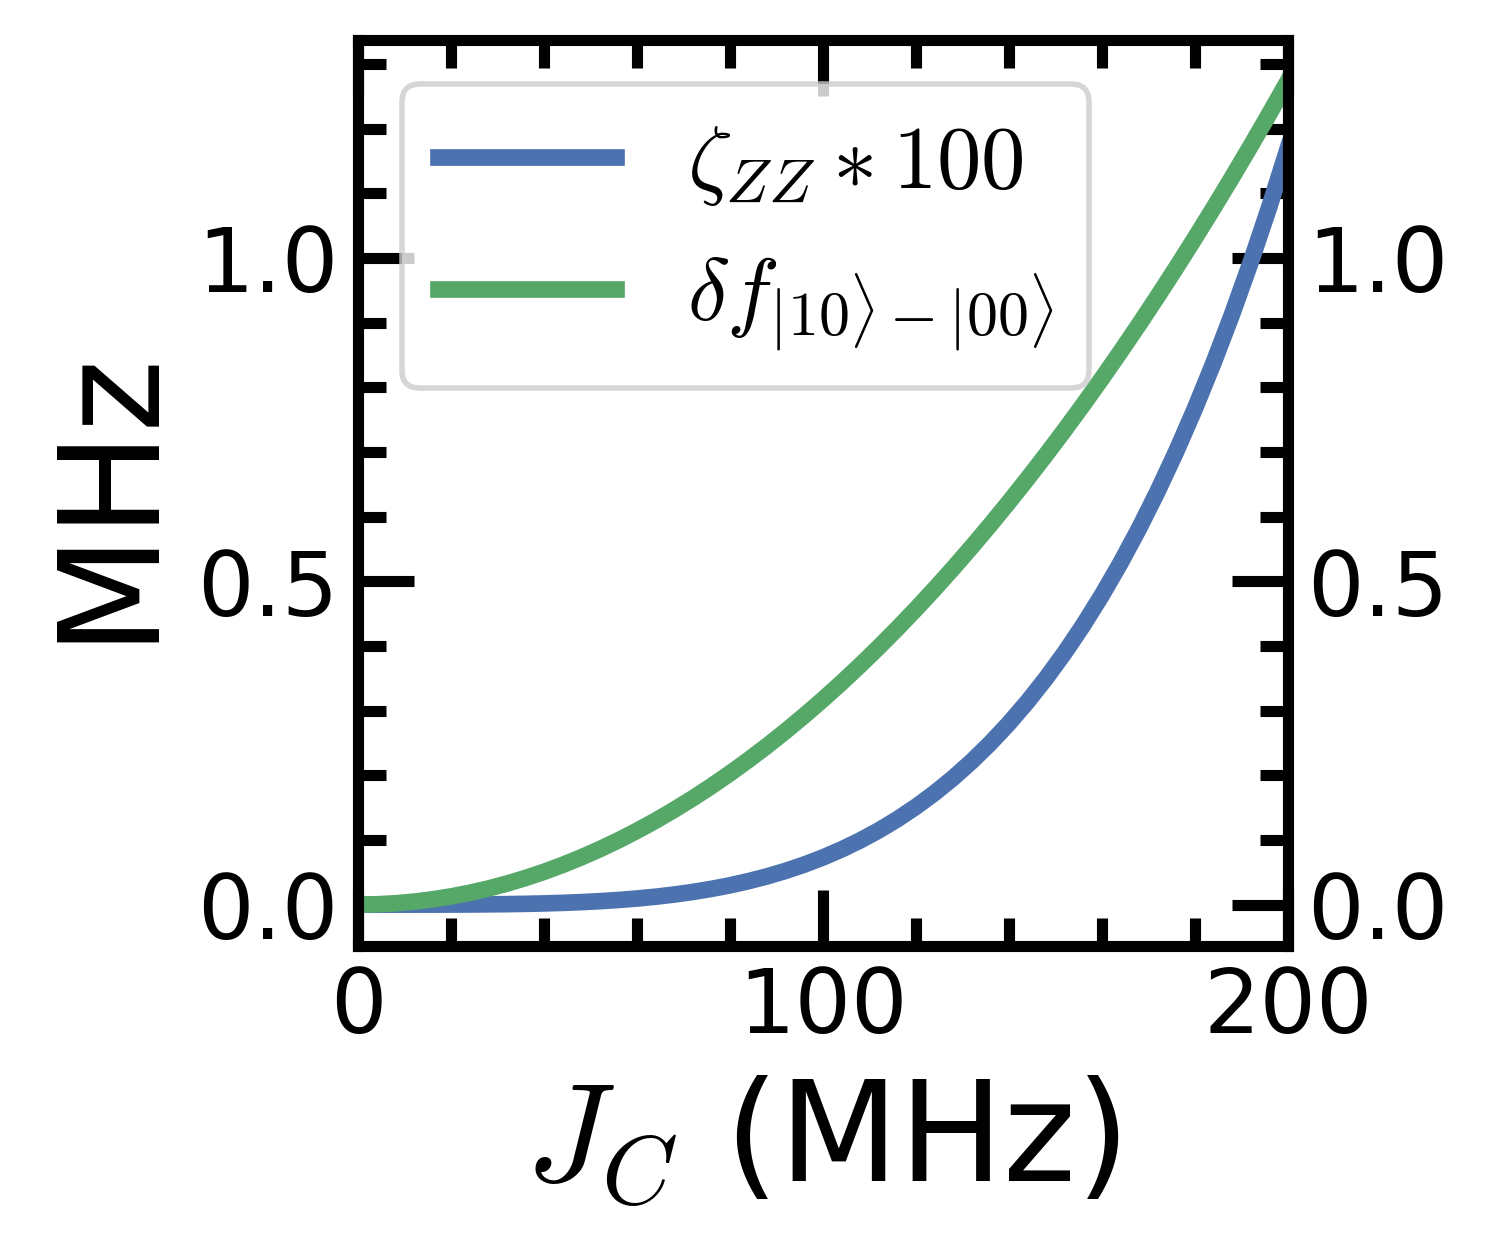

In [106]:
#Calculate ZZ rate:
plt.figure(figsize = [3,3])
zeta_ZZ = energies_coupled_swE[system.level_label('110'),:] - energies_coupled_swE[system.level_label('010'),:] \
- (energies_coupled_swE[system.level_label('100'), :] - energies_coupled_swE[system.level_label('000'), :])
freq_shift = energies_coupled_swE[system.level_label('100'), :] - energies_coupled_swE[system.level_label('000'), :]
freq_shift = freq_shift - freq_shift[0]
plt.plot(E_int_array*1e3, abs(zeta_ZZ)*1e5, label = r'$\zeta_{ZZ}*100$')
plt.plot(E_int_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |00\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
plt.xlabel('$J_C$ (MHz)')
plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])

## Sweep coupler's flux bias

In [115]:
#Sweep the coupler's bias
E_int = 0.2
E_int_direct = 0.0
phi_ext = 0.5*2*np.pi
phi_ext_coupler_array = np.linspace(0.3, 0.7, 51)*2*np.pi
qubit1.phi_ext = phi_ext
qubit2.phi_ext = phi_ext
energies_coupled_swE = np.zeros((qubit1.nlev * qubit2.nlev * 5, len(phi_ext_coupler_array)))
for idx, phi_ext_coupler in enumerate(phi_ext_coupler_array):
    coupler.phi_ext = phi_ext_coupler
    system = coupobj.CoupledObjects(qubit1, qubit2, coupler,
                                    [qubit1, coupler, E_int, coupling_type],
                                   [qubit2, coupler, E_int, coupling_type],
                                   [qubit1, qubit2, E_int_direct,'charge'])
    energies_coupled_swE[:,idx] = system.levels()

Text(0.5, 0, '$\\Phi_\\mathrm{ext}/\\Phi_0$')

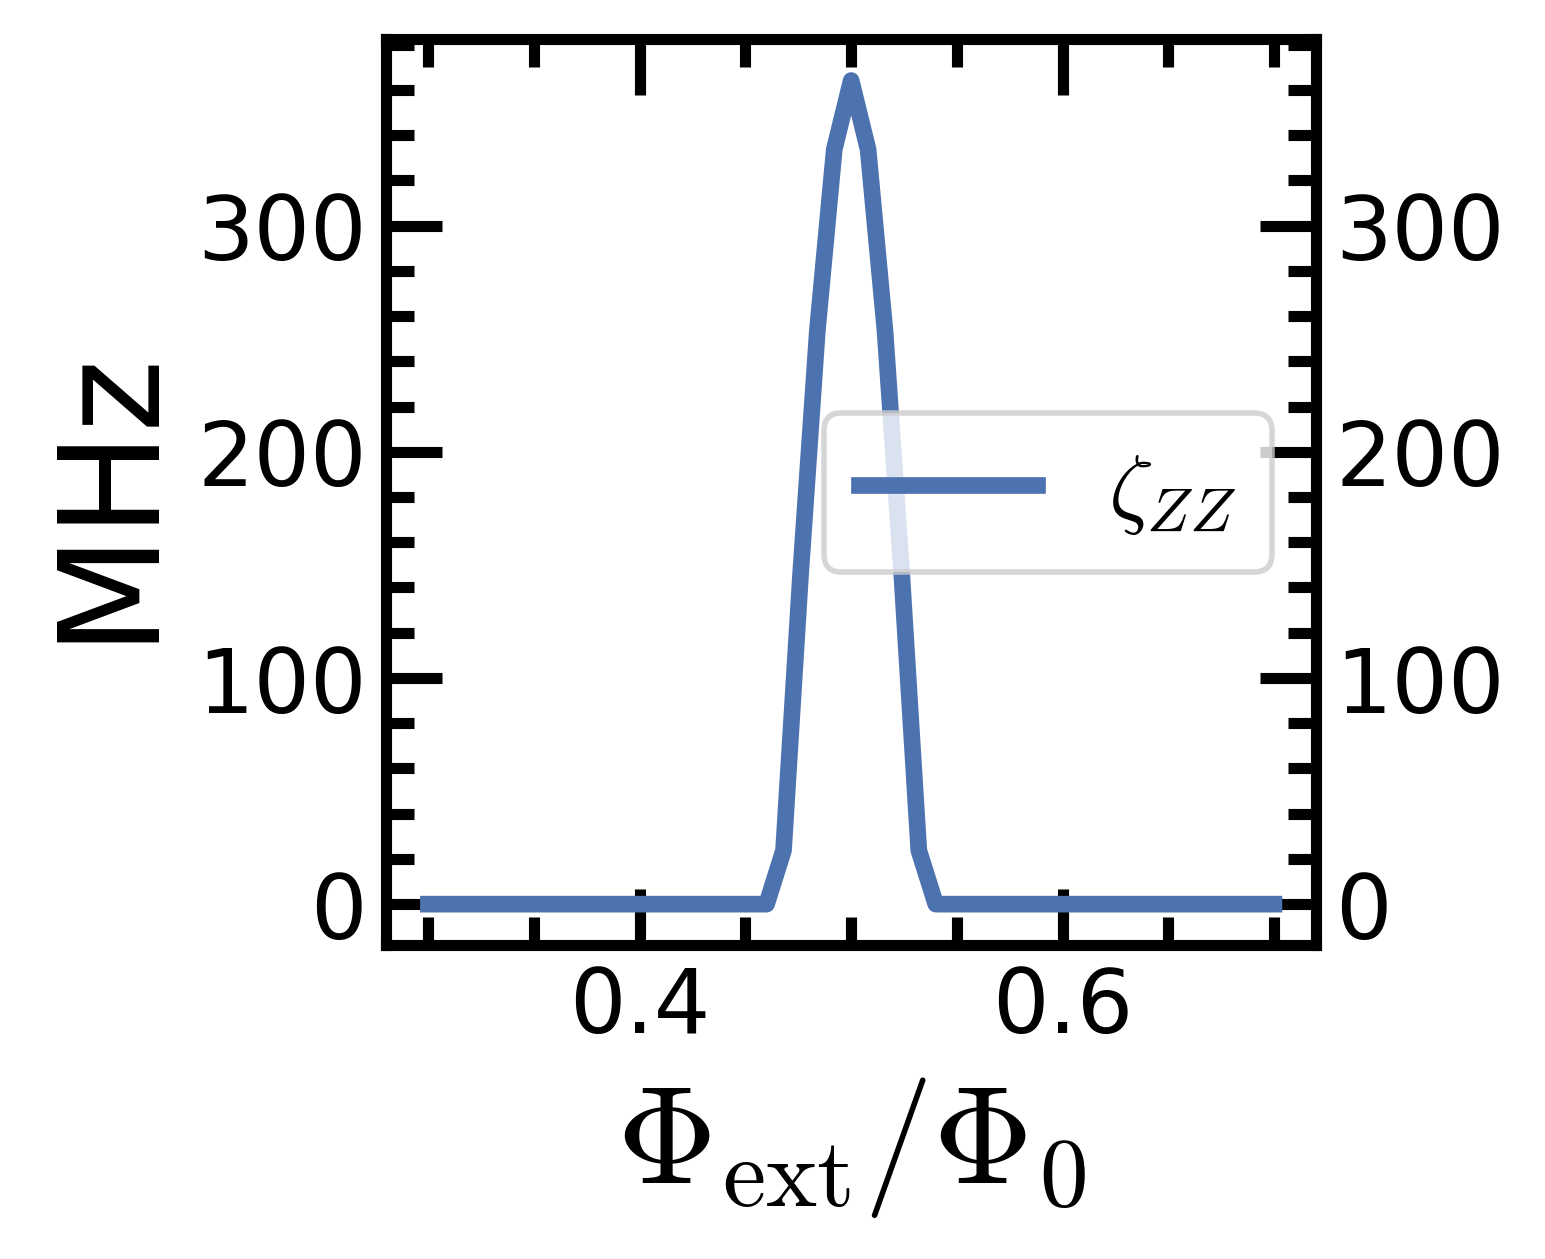

In [116]:
#Calculate ZZ rate:
plt.figure(figsize = [3,3])
zeta_ZZ = energies_coupled_swE[system.level_label('110'),:] - energies_coupled_swE[system.level_label('010'),:] \
- (energies_coupled_swE[system.level_label('100'), :] - energies_coupled_swE[system.level_label('000'), :])
freq_shift = energies_coupled_swE[system.level_label('100'), :] - energies_coupled_swE[system.level_label('000'), :]
freq_shift = freq_shift - freq_shift[0]
plt.plot(phi_ext_coupler_array/2/np.pi, abs(zeta_ZZ)*1e3, label = r'$\zeta_{ZZ}$')
# plt.plot(phi_ext_coupler_array*1e3, abs(freq_shift)*1e3, label = r'$\delta f _{|10\rangle - |00\rangle}$')
plt.legend()
plt.tick_params(left=True, right=True,labelleft=True, labelright=True)
plt.ylabel('MHz')
# plt.xlim([0, 0.5])
plt.xlabel(r'$\Phi_\mathrm{ext}/\Phi_0$')# plt.xlim([E_int_array[0]*1e3, E_int_array[-1]*1e3])